# 深度学习用于文本和序列

## 处理文本数据

### 单词和字符的one-hot编码

In [1]:
# 单词级的one-hot编码（简单示例）
import numpy as np

samples = ['The cat sat on the mat.','The dog ate my homework.']

token_index= {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index)+1
            
max_length = 10

results = np.zeros(shape = (len(samples),
                           max_length,
                           max(token_index.values())+1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] =1.

In [2]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [3]:
token_index

{'The': 1,
 'ate': 8,
 'cat': 2,
 'dog': 7,
 'homework.': 10,
 'mat.': 6,
 'my': 9,
 'on': 4,
 'sat': 3,
 'the': 5}

In [4]:
# 字符级的one-hot编码（简单示例）
import string

samples = ['The cat sat on the mat.','The dog ate my homework.']
characters = string.printable
token_index = dict(zip(characters,range(1,len(characters)+1)))

max_length = 50

results =np.zeros(shape=(len(samples),
                        max_length,
                        max(token_index.values())+1))

for i,sample in enumerate(samples):
    for j,character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i,j,index]=1.

In [5]:
# 用Keras实现单词级的one-hot编码
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.','The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)# 构建单词索引

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results= tokenizer.texts_to_matrix(samples,mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 9 unique tokens.


In [6]:
word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [7]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [8]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

### 使用词嵌入

#### 利用Embedding层学习词嵌入

In [9]:
# 将一个Embedding 层实例化
from keras.layers import Embedding
embedding_layer = Embedding(1000,64)

In [10]:
# 加载IMDB数据，准备用于Embedding层
from keras.datasets import imdb
from keras import preprocessing
max_features = 10000 # 作为特征的单词个数，只用这常用的单词作为特征
maxlen=20 # 只用评论的这么多，之后就截断了

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

In [11]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]])

In [12]:
# 在IMDB数据上使用Embedding层和分类层
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
model.summary()

history_1 = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 143us/step - loss: 0.6759 - acc: 0.6042 - val_loss: 0.6398 - val_acc: 0.6808
Epoch 2/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.5657 - acc: 0.

### 整合在一起：从原始文本到词嵌入

In [13]:
import os
imdb_dir = './data/imdb/'
train_dir = os.path.join(imdb_dir,'train')
labels = []
texts = []
for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname),encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

#### 对数据进行分词

In [14]:
# 对IMDB 原始数据的文本进行分词
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples=200
validation_samples=10000
max_words=10000

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found {} unique tokens.'.format(len(word_index)))

data = pad_sequences(sequences,maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:',data.shape)
print('Shape of label tensor:',labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


#### 对嵌入进行预处理

In [15]:
glove_dir = './data/glove.6B/'

embeddings_index = {}

f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='utf-8')
for line in f:
    values = line.split()
    word=values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word]=coefs
f.close()

print('Found {} word vectors.'.format(len(embeddings_index)))

Found 400000 word vectors.


In [16]:
# 准备GloVe词嵌入矩阵
embedding_dim = 100

embedding_matrix=np.zeros((max_words,embedding_dim))
for word, i in word_index.items():
    if i<max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

#### 定义模型

In [17]:
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense
model = Sequential()
model.add(Embedding(max_words,embedding_dim,input_length = maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### 在模型中加入GloVe嵌入

In [18]:
# 将预训练的词嵌入加载到Embedding层中
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable=False

#### 训练模型与评估模型

In [19]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train,y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val,y_val))
model.save_weights('./model/ch06/pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 1.6335 - acc: 0.5250 - val_loss: 0.7130 - val_acc: 0.5100
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.7565 - acc: 0.5800 - val_loss: 0.6910 - val_acc: 0.5418
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5956 - acc: 0.6950 - val_loss: 1.1205 - val_acc: 0.4936
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5335 - acc: 0.7350 - val_loss: 0.7134 - val_acc: 0.5362
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4713 - acc: 0.8100 - val_loss: 0.7177 - val_acc: 0.5589
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1448 - acc: 0.9800 - val_loss: 1.3373 - val_acc: 0.4952
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2545 - acc: 0.8800 - val_loss: 1.3110 - val_acc: 0.4960
Epoch 8/10
200/200 [========

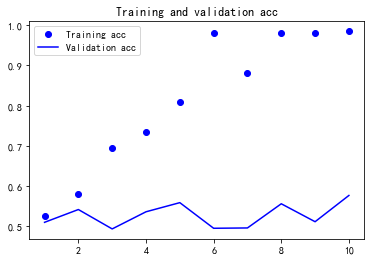

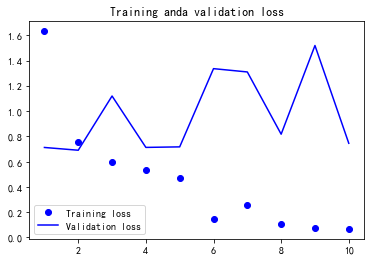

In [20]:
# 绘制结果
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training anda validation loss')
plt.legend()

plt.show()

In [21]:
# 在不适用预训练词嵌入的情况下，训练相同的模型
model = Sequential()
model.add(Embedding(max_words,embedding_dim,input_length = maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train,y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(x_val,y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6949 - acc: 0.4650 - val_loss: 0.6955 - val_acc: 0.5156
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4956 - a

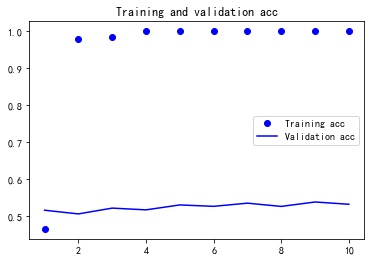

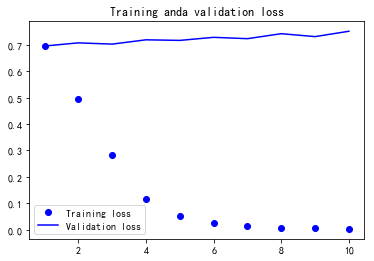

In [22]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training anda validation loss')
plt.legend()

plt.show()

In [23]:
# 对测试集数据进行分词
test_dir = os.path.join(imdb_dir,'test')
labels = []
texts = []
for label_type in ['neg','pos']:
    dir_name = os.path.join(test_dir,label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[:-4] == '.txt':
            f = open(os.path.join(dir_name,fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences,maxlen=maxlen)
y_test = np.asarray(labels)

In [24]:
# 在测试集上评估模型
model.load_weights('./model/ch06/pre_trained_glove_model.h5')
model.evaluate(x_test,y_test)

[]

## 理解循环神经网络

In [25]:
# 简单RNN的Numpy实现

timesteps = 100

input_features = 32
output_features = 64

inputs = np.random.random((timesteps,input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features,input_features))
U = np.random.random((output_features,output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W,input_t)+np.dot(U,state_t)+b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs,axis=0)

### Keras中的循环层

In [26]:
from keras.models import Sequential 
from keras.layers import Embedding,SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 准备IMDB数据集
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train,y_train),(input_test,y_test) = imdb.load_data(num_words = max_features)
print('Train sequences:',len(input_train))
print('Test sequences:',len(input_test))

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train,maxlen = maxlen)
input_test = sequence.pad_sequences(input_test,maxlen = maxlen)
print('input_train shape:',input_train.shape)
print('input_test shape:',input_test.shape)


Loading data...
Train sequences: 25000
Test sequences: 25000
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [29]:
# 用Embedding层和SimpleRNN层来训练模型
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(input_train,
                   y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 16s 814us/step - loss: 0.6406 - acc: 0.6126 - val_loss: 0.5423 - val_acc: 0.7332
Epoch 2/10
20000/20000 [==============================] - 16s 782us/step - loss: 0.4001 - acc: 0.8283 - val_loss: 0.4557 - val_acc: 0.7912
Epoch 3/10
20000/20000 [==============================] - 15s 753us/step - loss: 0.2982 - acc: 0.8795 - val_loss: 0.3633 - val_acc: 0.8554
Epoch 4/10
20000/20000 [==============================] - 16s 803us/step - loss: 0.2219 - acc: 0.9153 - val_loss: 0.3635 - val_acc: 0.8530
Epoch 5/10
20000/20000 [==============================] - 17s 846us/step - loss: 0.1587 - acc: 0.9415 - val_loss: 0.3899 - val_acc: 0.8616
Epoch 6/10
20000/20000 [==============================] - 14s 717us/step - loss: 0.1030 - acc: 0.9661 - val_loss: 0.4036 - val_acc: 0.8598
Epoch 7/10
20000/20000 [==============================] - 15s 767us/step - loss: 0.0616 - acc: 0.9803 - val_loss: 0.4

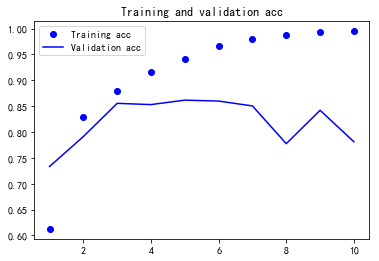

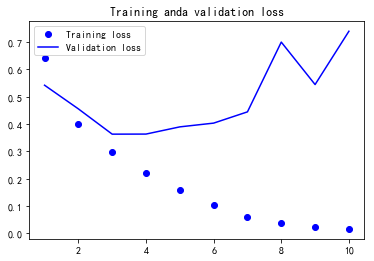

In [30]:
# 绘制结果
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training anda validation loss')
plt.legend()

plt.show()

### Keras中一个LSTM的具体例子

In [31]:
# 使用Keras中的LSTM层
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train,y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.5155 - acc: 0.7590 - val_loss: 0.3504 - val_acc: 0.8644
Epoch 2/10
20000/20000 [==============================] - 58s 3ms/step - loss: 0.2971 - acc: 0.8831 - val_loss: 0.3728 - val_acc: 0.8426
Epoch 3/10
20000/20000 [==============================] - 57s 3ms/step - loss: 0.2349 - acc: 0.9098 - val_loss: 0.2736 - val_acc: 0.8952
Epoch 4/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.2011 - acc: 0.9258 - val_loss: 0.3273 - val_acc: 0.8554
Epoch 5/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1725 - acc: 0.9356 - val_loss: 0.2925 - val_acc: 0.8882
Epoch 6/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1555 - acc: 0.9437 - val_loss: 0.3490 - val_acc: 0.8864
Epoch 7/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1363 - acc: 0.9515 - val_loss: 0.4807 - val_acc:

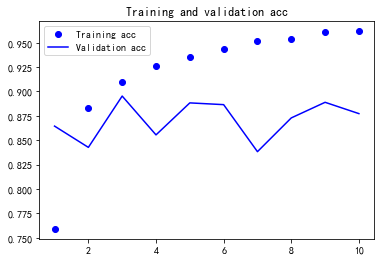

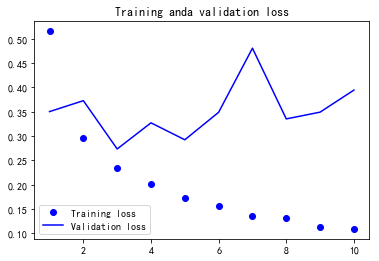

In [32]:
from function import draw_curve
draw_curve(history)